In [2]:
import pandas as pd
from collections import Counter
def make_column_names_unique(column_names):
    counts = Counter(column_names)
    result = []
    seen = {}

    for name in column_names:
        if counts[name] > 1:
            # Adiciona um sufixo numérico para as duplicatas
            if name not in seen:
                seen[name] = 1
            else:
                seen[name] += 1
            result.append(f"{name}_{seen[name]}")
        else:
            result.append(name)

    return result

2. O artigo Exploratory Analysis of Smartphone Sensor Data for Human Activity Recognition (link anexo) faz uso do conjunto de dados Human Activity Recognition Using Smartphones para analisar a predição de atividade humana. Para a preparação dos dados, é feita uma análise exploratória sobre o conjunto, reproduzida no notebook HAR_EDA.ipynb disponível em anexo. Execute todas as análises do notebook, e proponha pelo menos duas novas questões não contempladas para serem respondidas usando análise exploratória dos dados.

In [3]:
import numpy as np
import pandas as pd

# obter os recursos do arquivo features.txt
features = list()
with open(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# TRAIN DATA

In [4]:
# Obter os dados dos arquivos txt para o pandas DataFrame
X_train = pd.read_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt', sep='\s+', header=None)

X_train.columns = make_column_names_unique(features)

# Adicionar coluna de "subject" ao dataframe (corrigido caminho e removido squeeze)
X_train['subject'] = pd.read_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt', header=None).iloc[:, 0]

# Ler y_train e mapear as atividades (corrigido caminho e removido squeeze)
y_train = pd.read_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt', names=['Activity']).iloc[:, 0]
y_train_labels = y_train.map({
    1: 'ANDANDO',
    2: 'SUBINDO ESCADAS',
    3: 'DESCENDO ESCADAS',
    4: 'SENTADO',
    5: 'EM PÉ',
    6: 'DEITADO'
})

# Colocar todas as colunas em um único DataFrame
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

# Mostrar uma amostra
train.sample()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
227,0.269635,-0.008931,-0.089395,-0.997137,-0.966587,-0.985598,-0.997462,-0.966295,-0.985594,-0.943226,...,-0.01615,0.096747,0.512809,-0.477863,-0.749442,0.017871,-0.144098,1,4,SENTADO


In [5]:
train.shape


(7352, 564)

# TESTE DATA

In [6]:
# Obter os dados dos arquivos txt para o pandas DataFrame
X_test = pd.read_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt', sep='\s+', header=None)
X_test.columns = make_column_names_unique(features)
# Adicionar coluna "subject" ao DataFrame (sem o squeeze)
X_test['subject'] = pd.read_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\test\subject_test.txt', header=None).iloc[:, 0]

# Obter os rótulos y do arquivo txt (sem o squeeze)
y_test = pd.read_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt', names=['Atividade']).iloc[:, 0]
y_test_labels = y_test.map({
    1: 'ANDANDO',
    2: 'SUBINDO ESCADAS',
    3: 'DESCENDO ESCADAS',
    4: 'SENTADO',
    5: 'EM PÉ',
    6: 'DEITADO'
})

# Colocar todas as colunas em um único DataFrame
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

# Mostrar uma amostra do DataFrame
test.sample()
print(X_test.columns.tolist())

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

# LIMPEZA DE DADOS

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


# 3. Verifique se há desequilíbrio de dados

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

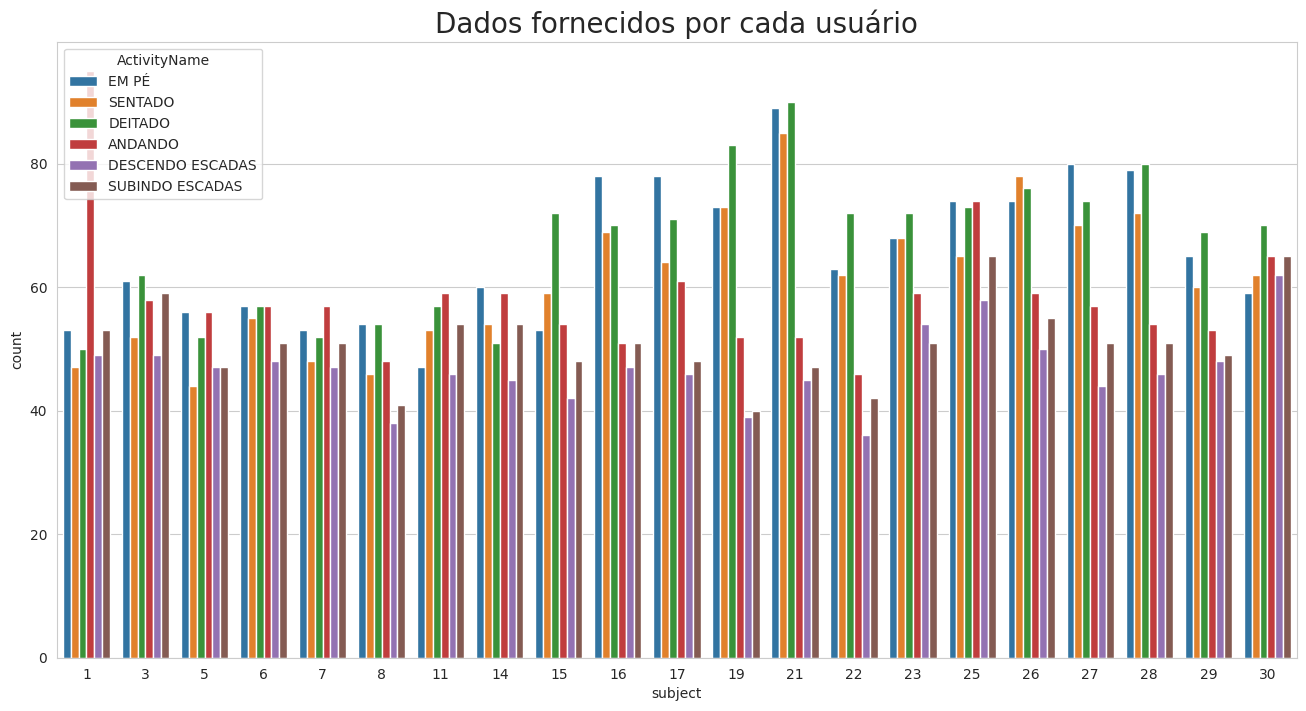

In [10]:
plt.figure(figsize=(16,8))
plt.title('Dados fornecidos por cada usuário', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


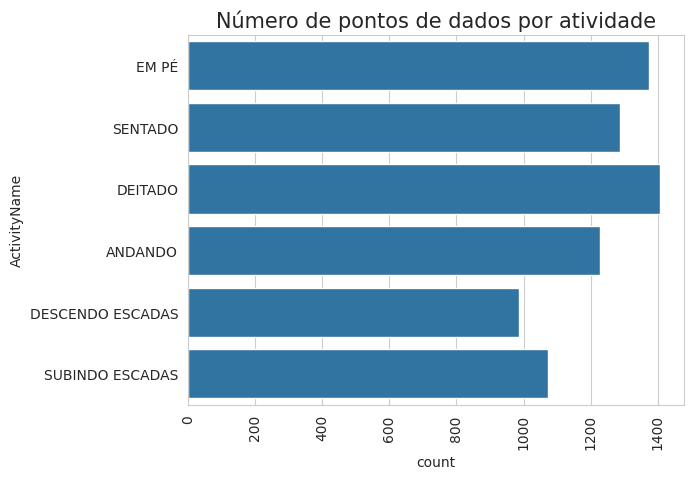

In [11]:
plt.title('Número de pontos de dados por atividade', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

# Alterando nomes de recursos

In [12]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

# salvando o Dataframe em um arquivo CSV

In [13]:
train.to_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\csv_files\train.csv', index=False)
test.to_csv(r'C:\Users\mique\Downloads\human+activity+recognition+using+smartphones (2)\UCI HAR Dataset\UCI HAR Dataset\csv_files\test.csv', index=False)


# EXPLORANDO OS DADOS

"Sem conhecimento de domínio, EDA não tem significado, sem EDA um problema não tem alma."

# 1. Apresentando Engenharia do Conhecimento de Domínio
Atividades Estáticas e Dinâmicas

Em atividades estáticas (sentar, ficar de pé, deitar), as informações de movimento não serão muito úteis.
Nas atividades dinâmicas (Caminhar, Caminhar para Cima, Caminhar para Baixo), as informações de movimento serão significativas.

### 2. Atividades estacionárias e móveis são completamente diferentes

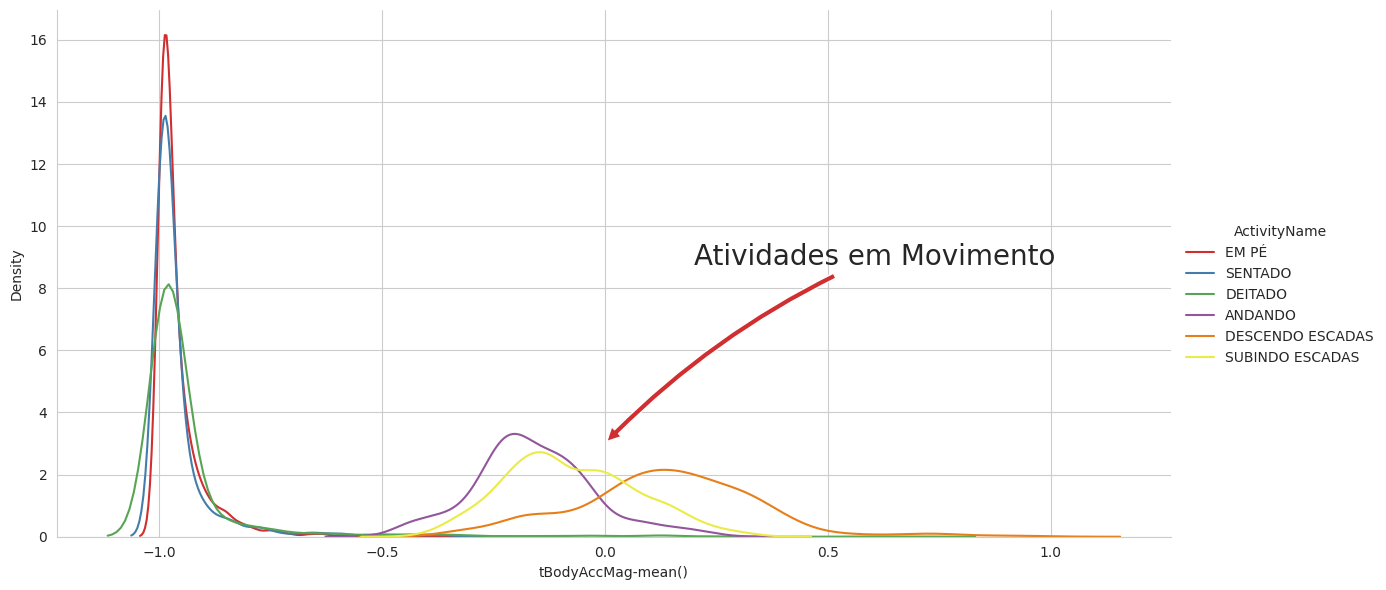

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a paleta de cores
sns.set_palette("Set1", desat=0.80)

# Cria um FacetGrid com o parâmetro correto
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6, aspect=2)

# Mapeia o gráfico de densidade
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', fill=False) \
    .add_legend()

# Anota as atividades estacionárias
plt.annotate("Atividades Estacionárias", xy=(-0.956, 17), xytext=(-0.9, 23), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Anota as atividades em movimento
plt.annotate("Atividades em Movimento", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Mostra o gráfico
plt.show()


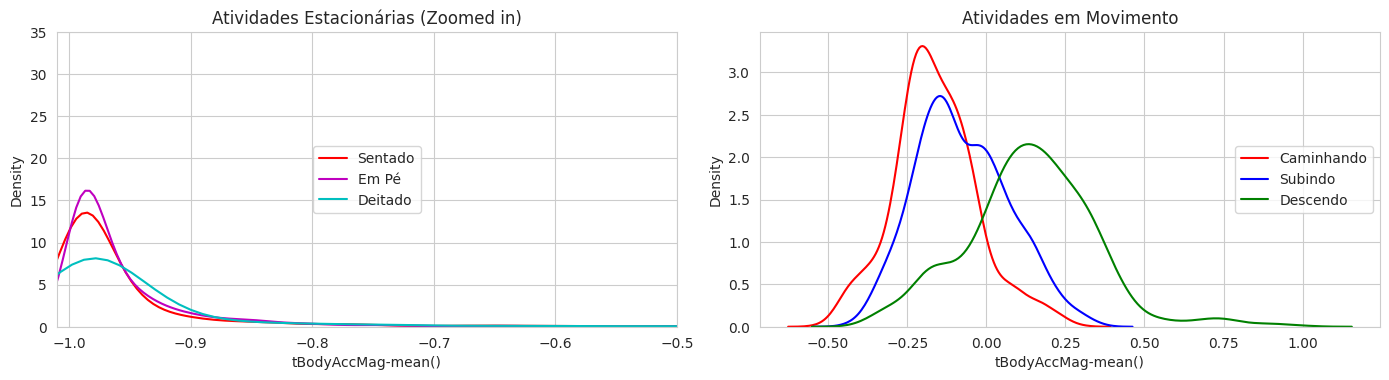

In [15]:
# para fins de plotagem, pegando os pontos de dados de cada atividade para um DataFrame diferente
df1 = train[train['Activity'] == 1]
df2 = train[train['Activity'] == 2]
df3 = train[train['Activity'] == 3]
df4 = train[train['Activity'] == 4]
df5 = train[train['Activity'] == 5]
df6 = train[train['Activity'] == 6]

plt.figure(figsize=(14, 7))

# Subplot para atividades estacionárias
plt.subplot(2, 2, 1)
plt.title('Atividades Estacionárias (Zoomed in)')
sns.kdeplot(df4['tBodyAccMag-mean()'], color='r', fill=False, label='Sentado')
sns.kdeplot(df5['tBodyAccMag-mean()'], color='m', fill=False, label='Em Pé')
sns.kdeplot(df6['tBodyAccMag-mean()'], color='c', fill=False, label='Deitado')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

# Subplot para atividades em movimento
plt.subplot(2, 2, 2)
plt.title('Atividades em Movimento')
sns.kdeplot(df1['tBodyAccMag-mean()'], color='red', fill=False, label='Caminhando')
sns.kdeplot(df2['tBodyAccMag-mean()'], color='blue', fill=False, label='Subindo')
sns.kdeplot(df3['tBodyAccMag-mean()'], color='green', fill=False, label='Descendo')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()



# 3. A magnitude de uma aceleração pode separá-la bem

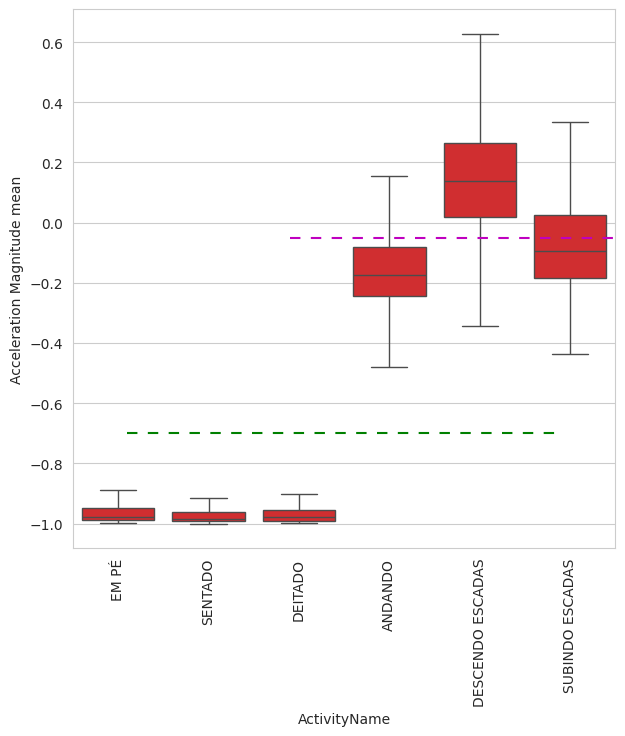

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

_ Observações__:

Se tAccMean for < -0,8, então as Atividades são Em pé, Sentado ou Deitado.
Se tAccMean for > -0,6, então as Atividades são Caminhando, Caminhando para Baixo ou Caminhando para Cima.
Se tAccMean > 0,0, então a Atividade é Caminhando para Baixo.
Podemos classificar 75% dos rótulos de Acitivity com alguns erros.

# 4. A posição dos componentes de aceleração de gravidade também é importante

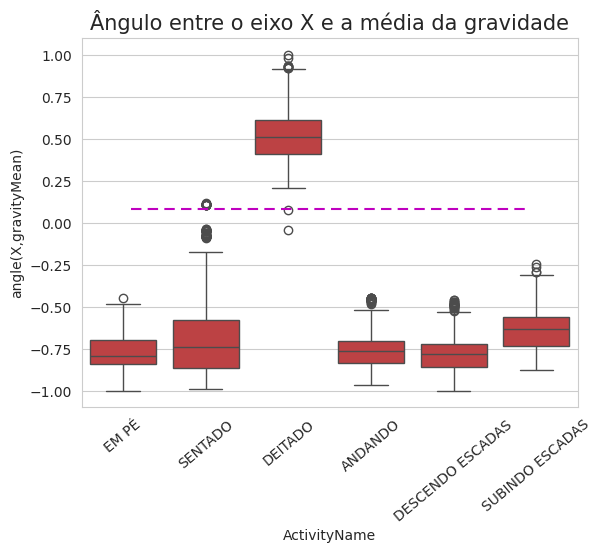

In [17]:
sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5, 3))
plt.title('Ângulo entre o eixo X e a média da gravidade', fontsize=15)  # Título traduzido
plt.xticks(rotation=40)
plt.show()


__ Observações__:

Se angleX,gravityMean > 0 então Activity é Laying.
Podemos classificar todos os pontos de dados pertencentes à atividade Laying com apenas uma única instrução if else.

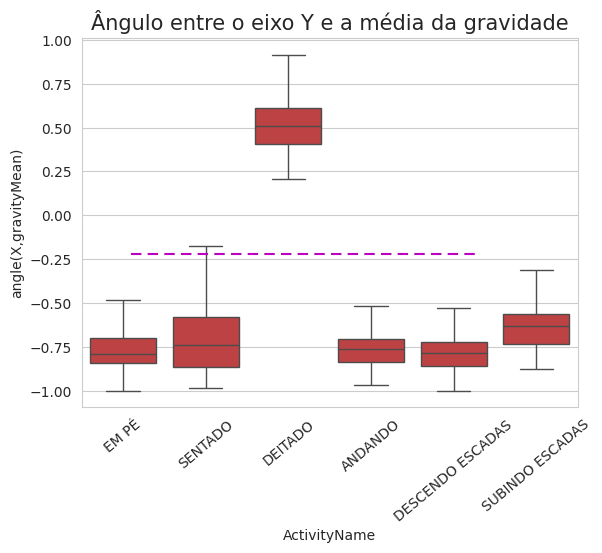

In [18]:
sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.title('Ângulo entre o eixo Y e a média da gravidade', fontsize=15)  # Título traduzido
plt.xticks(rotation=40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5, 3), c='m')
plt.show()


# Aplicar t-sne nos dados

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


Performando t-SNE com perplexidade 2 e 1000 iterações no máximo
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.024s...
[t-SNE] Computed neighbors for 7352 samples in 1.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 119.3519287, gradient norm = 0.0430747 (50 iterations in 2.390s)
[t-SNE] Iteration 100: error = 105.0393753, gradient norm = 0.0276793 (50 iterations in 1.

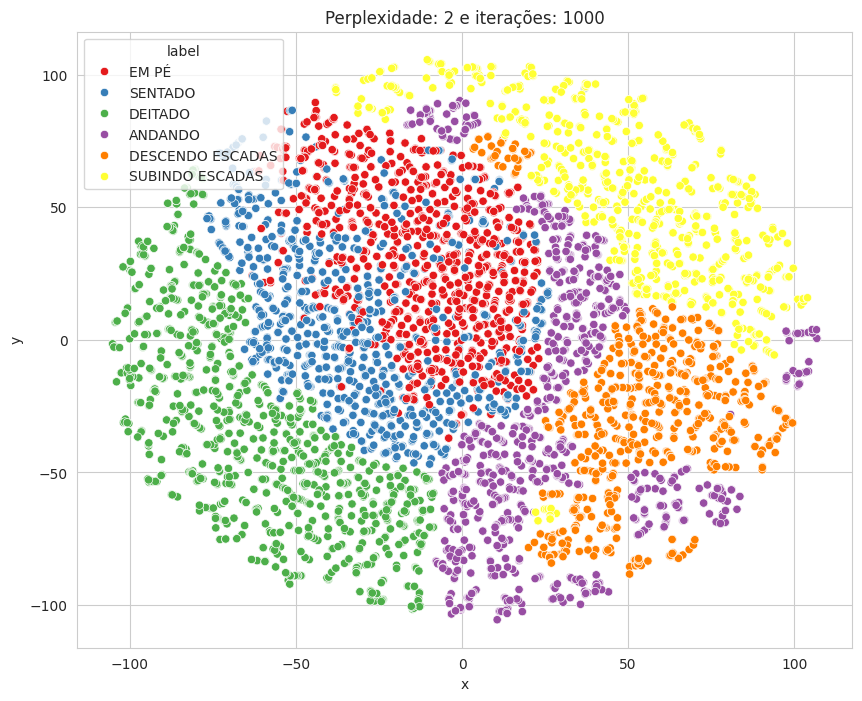

Concluído

Performando t-SNE com perplexidade 5 e 1000 iterações no máximo
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 1.014s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 107.1755753, gradient norm = 0.0406609 (50 iterations in 3.514s)
[t-SNE] Iteration 100: error = 95.6786041, gradient norm = 0.0144026 (50 iterat

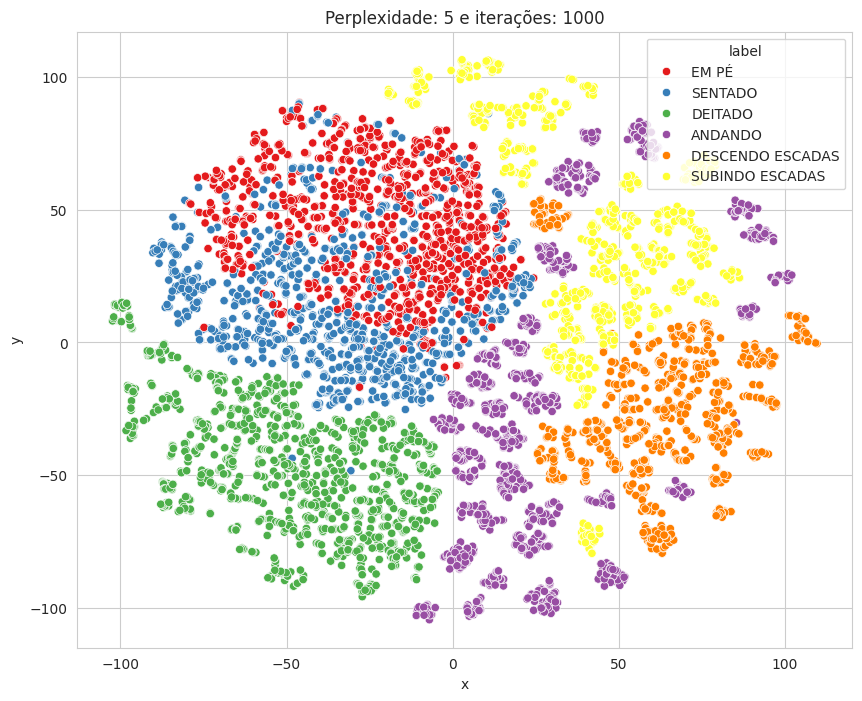

Concluído

Performando t-SNE com perplexidade 10 e 1000 iterações no máximo
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 1.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.156s
[t-SNE] Iteration 50: error = 97.8945236, gradient norm = 0.0371451 (50 iterations in 4.424s)
[t-SNE] Iteration 100: error = 88.9380722, gradient norm = 0.0106867 (50 iterat

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Preparação dos dados
X_pre_tsne = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']

# Função para realizar t-SNE com diferentes valores de perplexidade e seus respectivos gráficos
def perform_tsne(X_data, y_data, perplexities, max_iter=1000, img_name_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        # Realiza t-SNE
        print('\nPerformando t-SNE com perplexidade {} e {} iterações no máximo'.format(perplexity, max_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, max_iter=max_iter).fit_transform(X_data)
        print('Concluído..')

        # Prepara os dados para o seaborn         
        print('Criando gráfico para esta visualização de t-SNE..')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})

        # Desenha o gráfico
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=df, x='x', y='y', hue='label', palette="Set1", markers=['^', 'v', 's', 'o', '1', '2'])
        plt.title("Perplexidade: {} e iterações: {}".format(perplexity, max_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, max_iter)
        print('Salvando este gráfico como imagem no diretório de trabalho atual...')
        plt.savefig(img_name)
        plt.show()
        print('Concluído')

# Chamada da função
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2, 5, 10, 20, 50])


# QUESTÕES DE EXPLORAÇÃO DE DADOS PROPOSTAS POR MIM

# Como a magnitude do "jerk" (aceleração angular e linear) varia entre atividades dinâmicas e estáticas?

Uma análise detalhada da magnitude do jerk (tanto linear quanto angular) pode revelar se atividades dinâmicas (como caminhar) têm mudanças mais abruptas em comparação com atividades estáticas (como deitar). Isso pode ajudar a identificar se a magnitude do jerk é um bom indicador de movimento brusco e diferenciar claramente atividades dinâmicas de estáticas.

Essa análise pode revelar se as atividades dinãmicas (como caminhar) tem mudanças mais abruptas em comparação com atividades estáticas (como deitar). Isso pode ajudar a identificar se a magnitude do jerk é um bom indicador de movimento brusco e diferenciar claramente atividades dinâmicas de estáticas. o que pode ser relevante para identificar padrões em determinadas atividades. Essa análise pode ter aplicabilidade prática, como na detecção de acidentes graves, como quedas ou problemas no sono, considerando por exemplo, que normalmente no periodo em que a pessoa está deitada, não é comum ela apresentar movimentos abruptos, e caso apresente pode ser um indicativo de algum problema.

# Como o jerk se comporta ao longo do tempo para atividades contínuas, como caminhar?

Uma análise temporal do jerk pode ajudar a entender se o padrão de movimento muda de forma significativa ao longo do tempo durante atividades contínuas, como caminhar. Isso pode revelar informações sobre a regularidade ou irregularidade dos movimentos ao realizar a atividade.

In [ ]:
# # Filtrar para a atividade 'WALKING'
# walking_data = train[train['ActivityName'] == 'WALKING']
# 
# # Plotar o jerk ao longo das amostras temporais (eixos X, Y, Z)
# plt.figure(figsize=(12, 6))
# plt.plot(walking_data['tBodyAccJerk-mean()-X'].values[:500], label='Jerk-X')
# plt.plot(walking_data['tBodyAccJerk-mean()-Y'].values[:500], label='Jerk-Y')
# plt.plot(walking_data['tBodyAccJerk-mean()-Z'].values[:500], label='Jerk-Z')
# plt.title('Evolução do Jerk Linear durante Caminhada')
# plt.xlabel('Amostras temporais')
# plt.ylabel('Jerk')
# plt.legend()
# plt.show()


# 1. Análise de Correlação:

Análisar a correlação entre as variaveis com o intuito de perceber quais variaveis podem identificar melhor uma dada atividade, ou seja, quais são mais significativas para a distinção entre uma atividade e outra

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# #Criando a Matrix de Correlação
# 
# train.drop(columns=['ActivityName'], inplace=True)
# correlacaomatrix = train.corr()
# 
# #Vizualizando
# plt.figure(figsize=(15,10))
# sns.heatmap(correlacaomatrix, annot=True)
# plt.title("Matriz de correlacao")
# plt.show()